In [40]:
#!pip install geodatasets


In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geodatasets import get_path
import pandas as pd

# Load the "nybb" dataset using geodatasets
nybb_path = get_path('nybb')
nybb = gpd.read_file(nybb_path)

# Preview the data
print(nybb.head())




   BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...  


In [42]:
print(nybb.tail())


   BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...  


In [43]:
print(nybb.describe())


       BoroCode     Shape_Leng    Shape_Area
count  5.000000       5.000000  5.000000e+00
mean   3.000000  558317.333911  1.685981e+09
std    1.581139  249002.452978  9.034868e+08
min    1.000000  330470.010332  6.364715e+08
25%    2.000000  359299.096471  1.186925e+09
50%    3.000000  464392.991824  1.623820e+09
75%    4.000000  741080.523166  1.937479e+09
max    5.000000  896344.047763  3.045213e+09


In [44]:
print(nybb.info())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BoroCode    5 non-null      int32   
 1   BoroName    5 non-null      object  
 2   Shape_Leng  5 non-null      float64 
 3   Shape_Area  5 non-null      float64 
 4   geometry    5 non-null      geometry
dtypes: float64(2), geometry(1), int32(1), object(1)
memory usage: 308.0+ bytes
None


In [45]:
nybb.columns


Index(['BoroCode', 'BoroName', 'Shape_Leng', 'Shape_Area', 'geometry'], dtype='object')

In [46]:
# Print the data types of each column
print(nybb.dtypes)


BoroCode         int32
BoroName        object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object


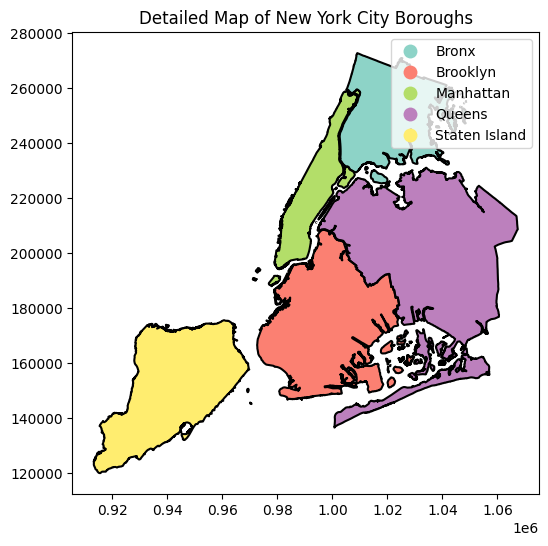

In [47]:
# Map Visualization with more details
fig, ax = plt.subplots(figsize=(10, 6))
nybb.boundary.plot(ax=ax, color='black')  # Add boundaries
nybb.plot(ax=ax, column='BoroName', cmap='Set3', legend=True)  # Color by borough name
plt.title('Detailed Map of New York City Boroughs')
plt.show()

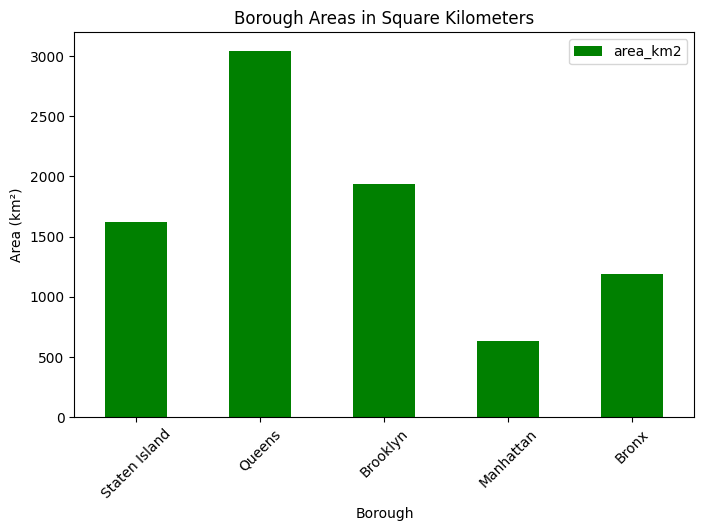

In [48]:
# Bar Graph: Borough areas
nybb['area_km2'] = nybb['Shape_Area'] / 1e6  # Convert area to square kilometers
fig, ax = plt.subplots(figsize=(8, 5))
nybb.plot(kind='bar', x='BoroName', y='area_km2', ax=ax, color='green')
plt.title('Borough Areas in Square Kilometers')
plt.xlabel('Borough')
plt.ylabel('Area (km²)')
plt.xticks(rotation=45)
plt.show()

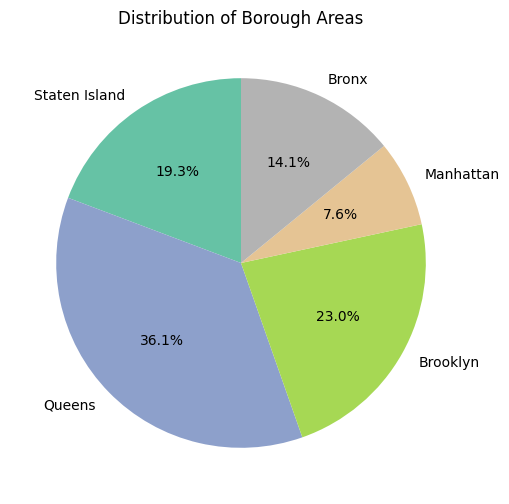

In [49]:
# Pie Chart: Distribution of borough areas
fig, ax = plt.subplots(figsize=(6, 6))
nybb.set_index('BoroName')['area_km2'].plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title('Distribution of Borough Areas')
plt.ylabel('')  # Hide the y-axis label for pie chart
plt.show()

